In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
data=pd.read_csv('House_Rental.csv',index_col='Unnamed: 0')
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [3]:
data.shape

(645, 7)

In [4]:
data.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [6]:
data.corr()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
Sqft,1.000000,0.143249,0.304515,0.615608,0.455940,0.728869,0.825514
Floor,0.143249,1.000000,0.564221,0.023986,-0.023563,0.099772,0.244553
TotalFloor,0.304515,0.564221,1.000000,0.067298,0.029373,0.146132,0.333631
Bedroom,0.615608,0.023986,0.067298,1.000000,0.526532,0.643083,0.467059
Living.Room,0.455940,-0.023563,0.029373,0.526532,1.000000,0.546826,0.328788
Bathroom,0.728869,0.099772,0.146132,0.643083,0.546826,1.000000,0.605542
Price,0.825514,0.244553,0.333631,0.467059,0.328788,0.605542,1.000000


In [7]:
#checking null values
pd.isnull(data).sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

<AxesSubplot:>

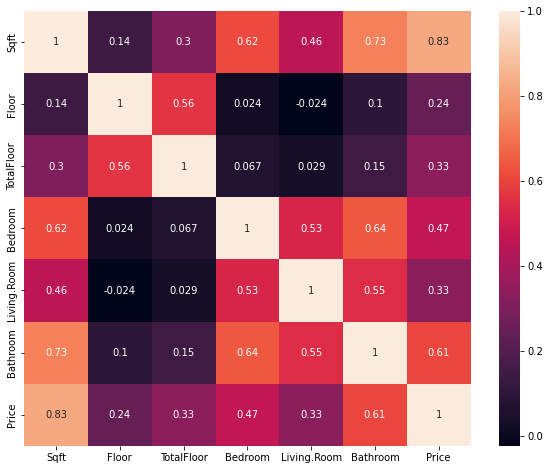

In [8]:
# Heat map visual
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

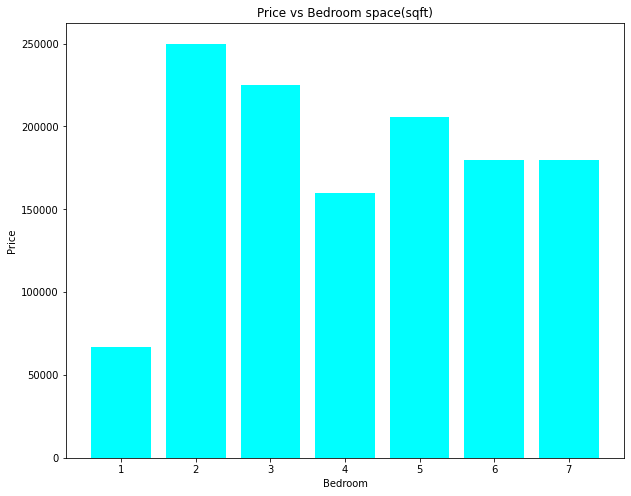

In [18]:
# Price acc to sqft of bedrooms
plt.figure(figsize=(10,8))
plt.bar(data['Bedroom'],data["Price"],color='cyan')
plt.xlabel("Bedroom")
plt.ylabel("Price")
plt.title("Price vs Bedroom space(sqft)")
plt.show()

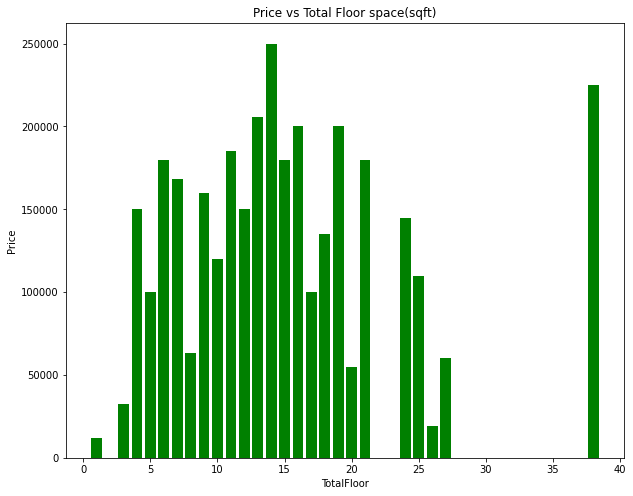

In [19]:
plt.figure(figsize=(10,8))
plt.bar(data["TotalFloor"],data["Price"],color='green')
plt.xlabel("TotalFloor")
plt.ylabel("Price")
plt.title("Price vs Total Floor space(sqft)")
plt.show()

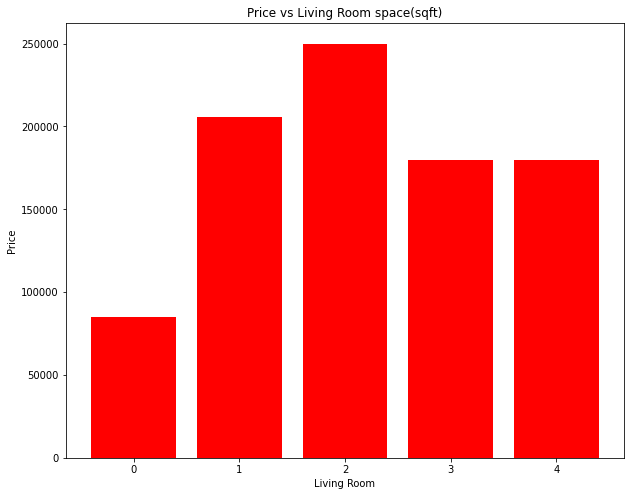

In [20]:
plt.figure(figsize=(10,8))
plt.bar(data["Living.Room"],data["Price"],color='red')
plt.xlabel("Living Room")
plt.ylabel("Price")
plt.title("Price vs Living Room space(sqft)")
plt.show()

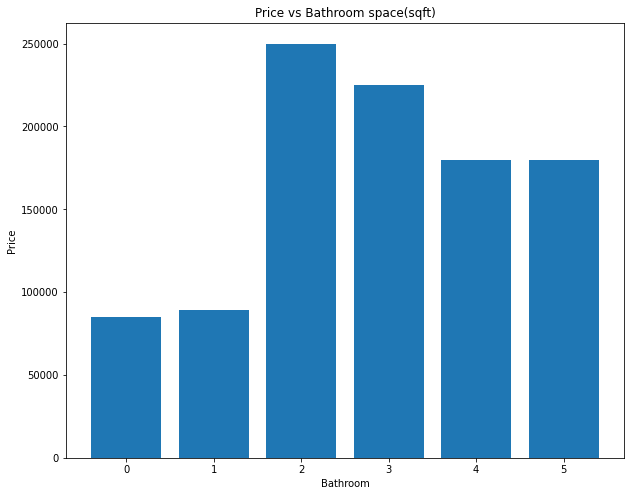

In [17]:
plt.figure(figsize=(10,8))
plt.bar(data["Bathroom"],data["Price"])
plt.xlabel("Bathroom")
plt.ylabel("Price")
plt.title("Price vs Bathroom space(sqft)")
plt.show()

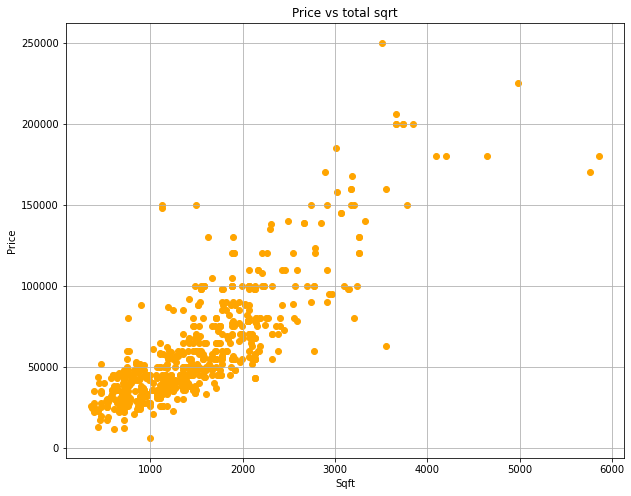

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(data["Sqft"],data["Price"],color='orange')
plt.xlabel("Sqft")
plt.ylabel("Price")
plt.grid()
plt.title('Price vs total sqrt')
plt.show()

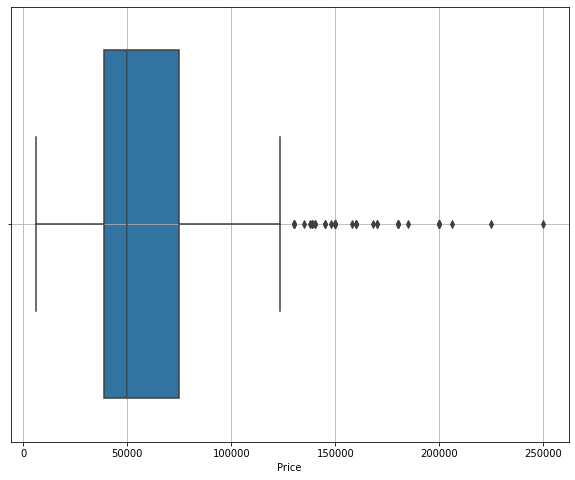

In [22]:
# for outliers
plt.figure(figsize=(10,8))
sns.boxplot(x=data["Price"])
plt.grid()

In [30]:
# dropping outliers
data.drop(data.index[list((np.where(data['Price']>100000)))],inplace=True)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


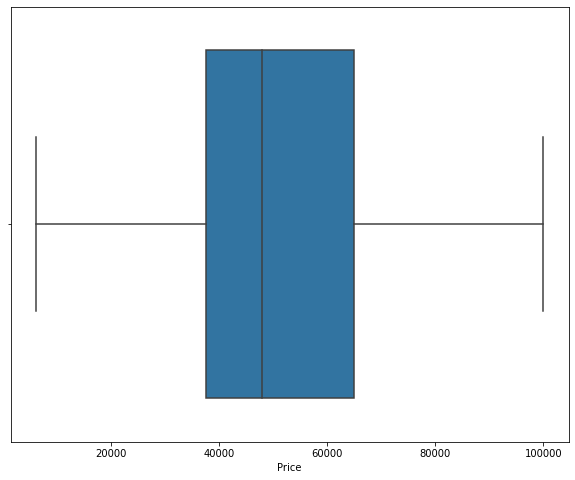

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(x=data["Price"])
plt.show()

In [32]:
data.shape

(583, 7)

In [33]:
data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [34]:
# setting train and test data

from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)


In [35]:
# standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [36]:
# finding best neighbor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,KFold
x_axis=[]
y_axis=[]
for i in range(1,26,2):
    reg=KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(reg,x_train,y_train,cv=KFold(n_splits=5))
    x_axis.append(i)
    y_axis.append(score.mean())

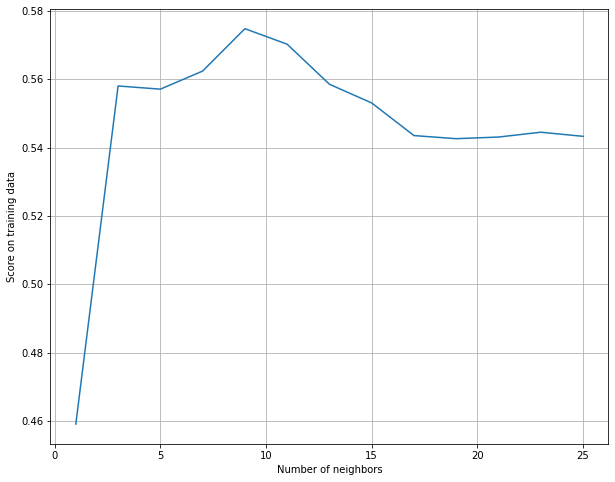

In [37]:
#plot for best neighbor

plt.figure(figsize=(10,8))
plt.plot(x_axis,y_axis)
plt.xlabel("Number of neighbors")
plt.ylabel("Score on training data")
plt.grid()
plt.show()

In [42]:
# from plot we get highest accurcy at neighbor =9

from sklearn.neighbors import KNeighborsRegressor
reg=KNeighborsRegressor(n_neighbors=9)
reg.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=9)

In [43]:
y_pred=reg.predict(x_test)
score_test=reg.score(x_test,y_test)
score_test

0.5831936115052571